# Homework 2: Q-Learning

2023 Reinforcement Learning

Kyung Hee University

# Environment: Frozen Lake

Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) by walking over the Frozen(F) lake. The agent may not always move in the intended direction due to the slippery nature of the frozen lake.

- Action Space : Discrete(4)
- Observation Space : Discrete(16)

## Action Space
The agent takes a 1-element vector for actions. The action space is (dir), where dir decides direction to move in which can be:

0: LEFT

1: DOWN

2: RIGHT

3: UP

## Observation Space
the 4x4 map has 16 possible observations.

## Rewards
Reach goal(G): +1

Reach hole(H): 0

Reach frozen(F): 0

# Example (4X4 Frozen Lake)
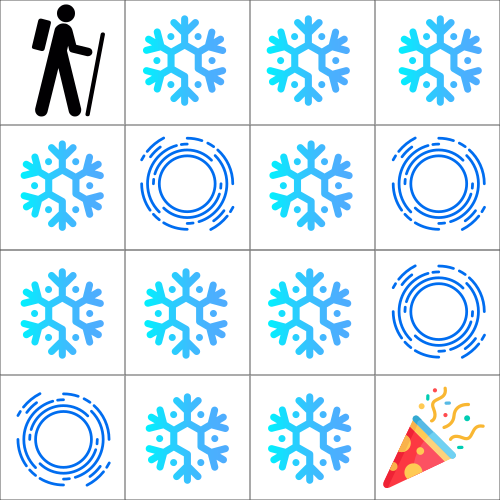

In [6]:
import numpy as np 
import gym
import random
from gym.envs.registration import register
import matplotlib.pyplot as plt
import time
import seaborn as sns

if 'FrozenLake8x8NotSlippery-v0' in gym.envs.registry.env_specs:
    del gym.envs.registry.env_specs['FrozenLake8x8NotSlippery-v0']

register(
    id='FrozenLake8x8NotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=1000,
    reward_threshold=0.8196
)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:440: UserWarning: WARN: The `registry.env_specs` property along with `EnvSpecTree` is deprecated. Please use `registry` directly as a dictionary instead.
  logger.warn(


# Hyperparameter

In [7]:
n_episodes = 100000
gamma = 1.0
env = gym.make("FrozenLake8x8NotSlippery-v0")

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# Action Function

In [8]:
# Exploitation
def greedy_action(state,Q):

  action=np.argmax(Q[state,:])

  return action

# Exploration
def e_greedy_action(state,Q,epsilon):
  
  if np.random.rand() < epsilon:
      action = env.action_space.sample()
  else:
      action = np.argmax(Q[state, :])

  return action

# Double Q Learning

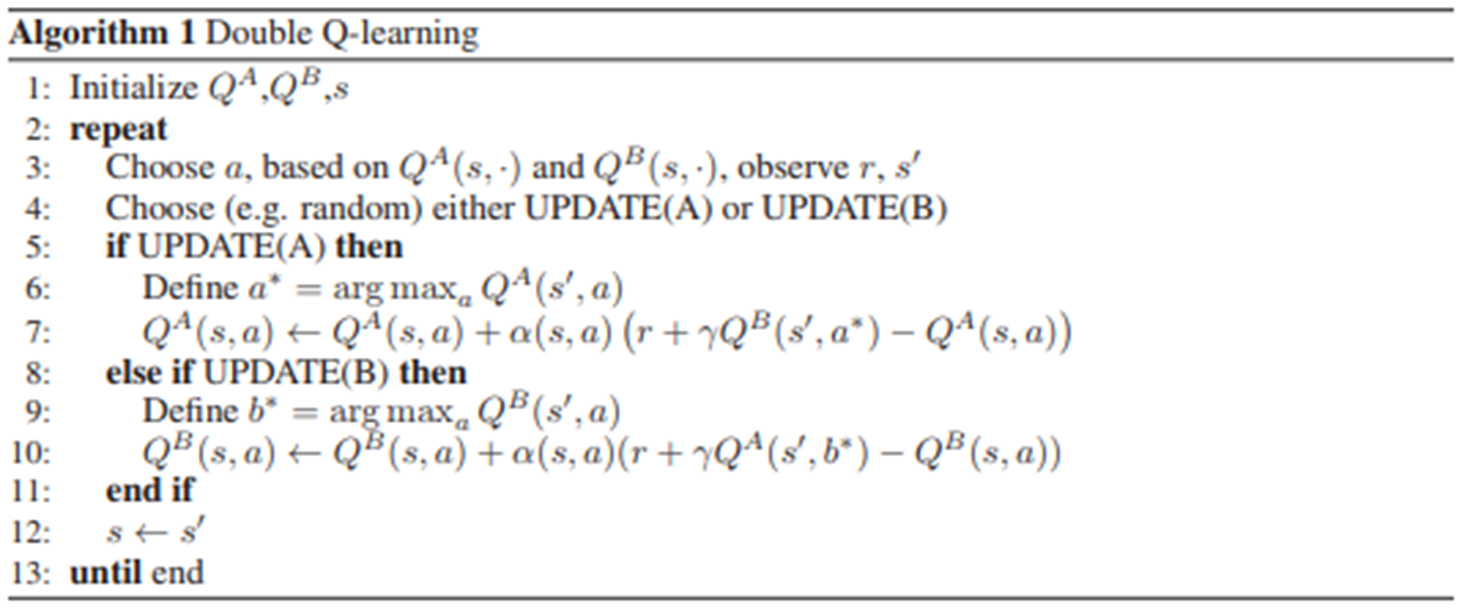

In [15]:
# Double Q-learning 구현

# Double Q-Learning
Q_A =np.zeros([env.observation_space.n, env.action_space.n])
Q_B =np.zeros([env.observation_space.n, env.action_space.n])

Reward_list = []
score_D_Q = list()

current_epsilon=1.0
k = 1.0
lr = 1e-2

for i in range(n_episodes):

  state = env.reset()
  done = False
  G=0

  # Implement HERE ----------------------------------------------------------
  while not done :
    current_epsilon = 1.0 / (k * 0.01)

    if np.random.rand() > 0.5 : 
      action = e_greedy_action(state, Q_A, current_epsilon)
      new_state, reward, done, _ = env.step(action)

      td_target = reward + gamma * Q_B[new_state,:].max() * (1-done)
      Q_A[state,action] += lr * (td_target - Q_A[state,action])

    else :
      action = e_greedy_action(state, Q_B, current_epsilon)
      new_state, reward, done, _ = env.step(action)

      td_target = reward + gamma * Q_A[new_state,:].max() * (1-done)
      Q_B[state,action] += lr * (td_target - Q_B[state,action])

    state = new_state
    G += reward
  # -------------- Do not modify anything outside ---------------------------
  k = k + 1.0
  Reward_list.append(G)


  if (i+1) % 1000 == 0:
    print("Current score: {:.3f}".format(sum(Reward_list) / i))
    score_D_Q.append(sum(Reward_list)/i)

env.close()

Current score: 0.639
Current score: 0.773
Current score: 0.833
Current score: 0.864
Current score: 0.885
Current score: 0.899
Current score: 0.911
Current score: 0.920
Current score: 0.927
Current score: 0.933
Current score: 0.938
Current score: 0.942
Current score: 0.945
Current score: 0.949
Current score: 0.952
Current score: 0.954
Current score: 0.957
Current score: 0.959
Current score: 0.960
Current score: 0.962
Current score: 0.963
Current score: 0.964
Current score: 0.966
Current score: 0.967
Current score: 0.968
Current score: 0.969
Current score: 0.970
Current score: 0.971
Current score: 0.972
Current score: 0.973
Current score: 0.973
Current score: 0.974
Current score: 0.975
Current score: 0.975
Current score: 0.976
Current score: 0.976
Current score: 0.977
Current score: 0.978
Current score: 0.978
Current score: 0.978
Current score: 0.979
Current score: 0.979
Current score: 0.980
Current score: 0.980
Current score: 0.981
Current score: 0.981
Current score: 0.981
Current score

# Visualization

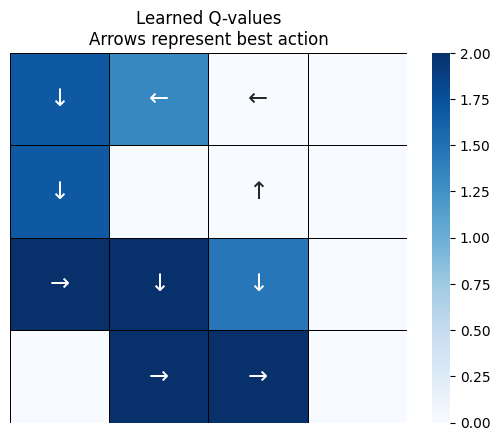

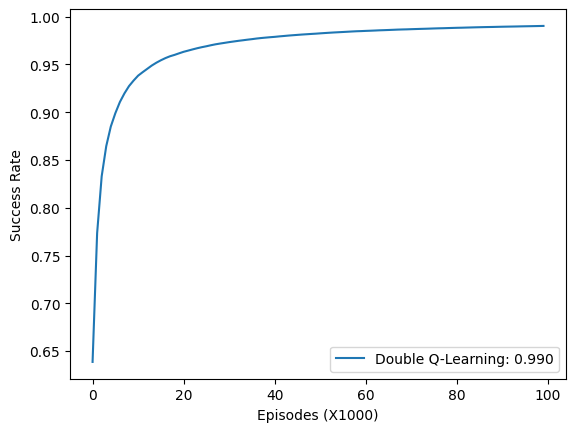

In [16]:
def qtable_directions_map(qtable, map_size):
    """Get the best learned action & map it to arrows."""
    qtable_val_max = qtable.max(axis=1).reshape(map_size, map_size)
    qtable_best_action = np.argmax(qtable, axis=1).reshape(map_size, map_size)
    directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    qtable_directions = np.empty(qtable_best_action.flatten().shape, dtype=str)
    eps = np.finfo(float).eps  # Minimum float number on the machine
    for idx, val in enumerate(qtable_best_action.flatten()):
        if qtable_val_max.flatten()[idx] > eps:
            qtable_directions[idx] = directions[val]
    qtable_directions = qtable_directions.reshape(map_size, map_size)
    return qtable_val_max, qtable_directions


def plot_q_values_map(qtable, env, map_size):
    """Plot the last frame of the simulation and the policy learned."""
    qtable_val_max, qtable_directions = qtable_directions_map(qtable, map_size)


    # Plot the policy
    sns.heatmap(
        qtable_val_max,
        annot=qtable_directions,
        fmt="",
        cmap=sns.color_palette("Blues", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
        xticklabels=[],
        yticklabels=[],
        annot_kws={"fontsize": "xx-large"},
    ).set(title="Learned Q-values\nArrows represent best action")
    plt.show()

plot_q_values_map(Q_A+Q_B,env,4)

plt.plot(np.arange(len(score_D_Q)),score_D_Q)
plt.xlabel("Episodes (X1000)")
plt.ylabel("Success Rate")
plt.legend(["Double Q-Learning: {:.3f}".format(max(score_D_Q))])
plt.show()